In [1]:
pip install tensorflow_datasets


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached importlib_resources-6.4.0-py3-none-any.whl.metadata (3.9 kB)
   ---------------------------------------- 0.0/5.1 MB ? eta -:--:--
    --------------------------------------- 0.1/5.1 MB 4.5 MB/s eta 0:00:02
   - -------------------------------------- 0.2/5.1 MB 2.8 MB/s eta 0:00:02
   -- ------------------------------------- 0.3/5.1 MB 2.9 MB/s eta 0:00:02
   --- ------------------------------------ 0.4/5.1 MB 3.0 MB/s eta 0:00:02
   ---- ----------------------------------- 0.5/5.1 MB 2.8 MB/s eta 0:00:02
   ----- ---------------------------------- 0.7/5.1 MB 2.7 MB/s eta 0:00:02
   ------ --------------------------------- 0.8/5.1 MB 2.6 MB/s eta 0:00:02
   ------- -------------------------------- 0.9/5.1 MB 2.7 MB/s eta 0:00:02
 


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: C:\Users\Nguyen Hai Duong\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [7]:
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
import datetime
import matplotlib.pyplot as plt

In [26]:

## Loading MNIST dataset
(train_ds, train_labels), (test_ds, test_labels) = tf.keras.datasets.mnist.load_data()

# test
print(train_ds.shape)
print(test_ds.shape)
print(len(train_labels))
print(len(test_labels))

# 28x28 images
train_ds[0]




(60000, 28, 28)
(10000, 28, 28)
60000
10000


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [27]:

## MNIST dataset images are 28*28, and they are between 0-255. 
#Preprocessing part 1: get values between 0-1

train_ds = train_ds / 255.0
test_ds = test_ds / 255.0

train_ds[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [28]:
print(train_labels)

# we need to convert the labels to one-hot encoding
# because we have 10 classes, we need to convert the labels to a vector of size 10
# 5 -> [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# 7 -> [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
# 0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

[5 0 4 ... 5 6 8]


In [29]:
# use to_categorical function to match categories to labels
# create matrix for each label

# if i have 4 labels 'german', 'english', 'french', 'spanish'
# and i have 5 samples
# german -> [1, 0, 0, 0]
# english -> [0, 1, 0, 0]
# french -> [0, 0, 1, 0]
# spanish -> [0, 0, 0, 1]
# [german, english, french, spanish] -> [ [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1] ]

## Transforming labels
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

print(train_labels[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [36]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

## Loading VGG16 model
# use the weights that has been trained before
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))

# freeze the weights of the model
base_model.trainable = False ## Not trainable weights

In [37]:
# use preporcess_input function

## Preprocessing part 2
# convert the images to 3 channels
train_ds = tf.image.grayscale_to_rgb(tf.expand_dims(train_ds, -1))

# resize the images to 32x32 (VGG16 input size, 28x28 is the original size)
train_ds = tf.image.resize(train_ds, (32, 32))
train_ds = preprocess_input(train_ds)

# convert images to 3D, 32x32x3
test_ds = tf.image.grayscale_to_rgb(tf.expand_dims(test_ds, -1))
test_ds = tf.image.resize(test_ds, (32, 32))
test_ds = preprocess_input(test_ds)


ValueError: 'images' must have either 3 or 4 dimensions.

In [32]:
tf.expand_dims(train_ds, -1).shape

TensorShape([60000, 32, 32, 3, 1])

In [ ]:
base.model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 156s 102ms/step - accuracy: 0.2748 - loss: 2.0609 - val_accuracy: 0.5335 - val_loss: 1.3099
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 164s 109ms/step - accuracy: 0.5616 - loss: 1.2453 - val_accuracy: 0.6207 - val_loss: 1.0744
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 172s 115ms/step - accuracy: 0.6298 - loss: 1.0639 - val_accuracy: 0.6467 - val_loss: 1.0071
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 154s 103ms/step - accuracy: 0.6490 - loss: 1.0015 - val_accuracy: 0.7018 - val_loss: 0.8685
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 171s 114ms/step - accuracy: 0.6722 - loss: 0.9198 - val_accuracy: 0.7143 - val_loss: 0.8317
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 76ms/step - accuracy: 0.6987 - loss: 0.8710
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 80ms/step


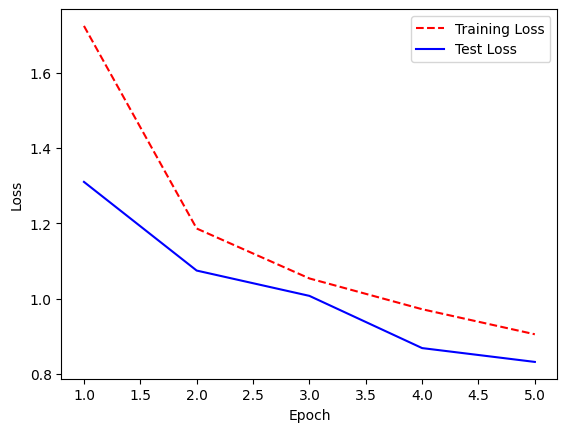

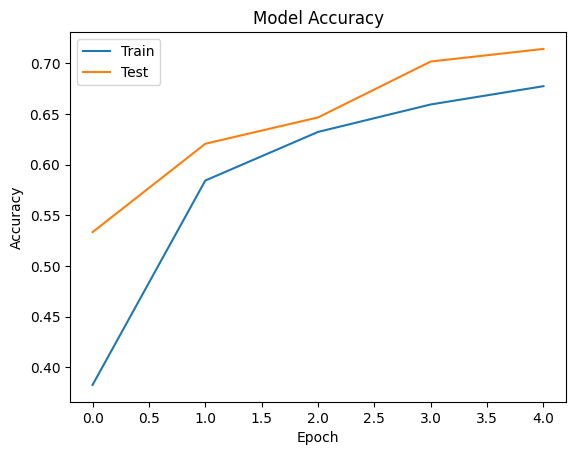

Training time: 0:14:27.657935
Test score: 0.8121021389961243
Test accuracy: 0.7160000205039978


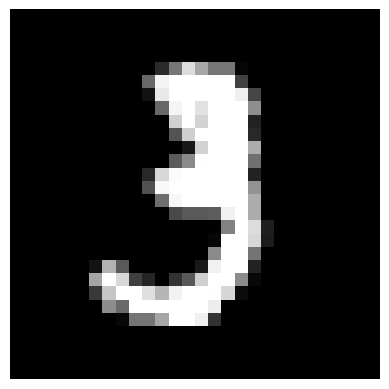

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Actual class: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Predicted class: 3


In [38]:
# -*- coding: utf-8 -*-
"""
Created on Sun Jun 11 13:51:04 2023

@author: Maryam Hashemi
"""
############################### 5.1 Exercise #####################################

############################ 5.1.2 ####################################


# import tensorflow_datasets as tfds
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import datetime
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
# import cv2



## Loading MNIST dataset
(train_ds, train_labels), (test_ds, test_labels) = tf.keras.datasets.mnist.load_data()


## MNIST dataset images are 28*28, and they are between 0-255. 
#Preprocessing part 1 
train_ds = train_ds / 255.0
test_ds = test_ds / 255.0

## Transforming labels
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)



############################ 5.1.3 ####################################

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False ## Not trainable weights

## Preprocessing part 2
train_ds = tf.image.grayscale_to_rgb(tf.expand_dims(train_ds, -1))
train_ds = tf.image.resize(train_ds, (32, 32))
train_ds = preprocess_input(train_ds)

test_ds = tf.image.grayscale_to_rgb(tf.expand_dims(test_ds, -1))
test_ds = tf.image.resize(test_ds, (32, 32))
test_ds = preprocess_input(test_ds)



############################ 5.1.4 ####################################

base_model.summary()



############################ 5.1.5 ####################################

from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(10, activation='softmax')

model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True)

start = datetime.datetime.now()

history = model.fit(train_ds, train_labels, epochs=5, validation_split=0.2, batch_size=32, callbacks=[es])

score = model.evaluate(test_ds, test_labels, batch_size=32)
x_valid_output_images = model.predict(test_ds)

# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)


############################ 5.1.6 ####################################

# Visualize loss history
plt.plot(epoch_count, history.history['loss'], 'r--')
plt.plot(epoch_count, history.history['val_loss'], 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

end = datetime.datetime.now()
elapsed = end - start
print('Training time:', str(elapsed))
print('Test score:', score[0])
print('Test accuracy:', score[1])


############################ 5.1.7 ####################################


## Loading MNIST dataset
(train_ds, train_labels), (test_ds, test_labels) = tf.keras.datasets.mnist.load_data()

## Displaying an image
image_index = 10
plt.imshow(train_ds[image_index], cmap='gray')
plt.axis('off')
plt.show()

## Rescaling images
train_ds = train_ds / 255.0
test_ds = test_ds / 255.0

## Remaining code for model training and evaluation
# (Please copy the code provided in the previous response here)

# Use the image for prediction
input_image = tf.image.grayscale_to_rgb(tf.expand_dims(train_ds[image_index], -1))
input_image = tf.image.resize(input_image, (32, 32))
input_image= preprocess_input(input_image)
input_image = tf.expand_dims(input_image, axis=0)


## Transforming labels to correct format
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

predicted_label = model.predict(input_image)
predicted_class = tf.argmax(predicted_label, axis=1).numpy()[0]

actual_class = train_labels[image_index]

print("Actual class:", actual_class)
print("Predicted class:", predicted_class)

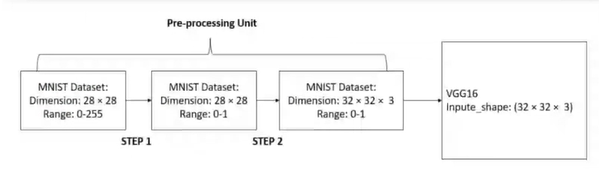